Cantidad de filas y columnas: (129971, 14)
Nombre de columnas: Index(['ID', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
Tipos de datos: ID                         int64
country                   object
description               object
designation               object
points                   float64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object
Estructura general de los datos:
   ID   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is

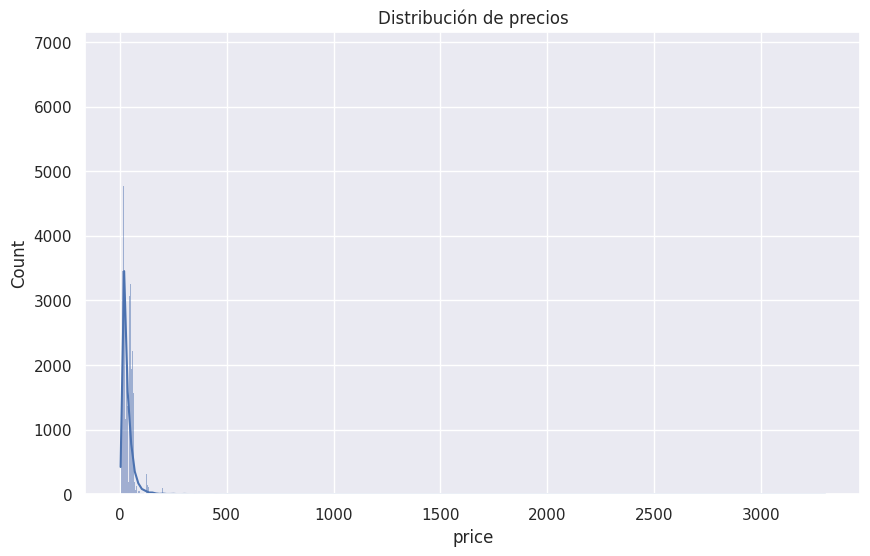

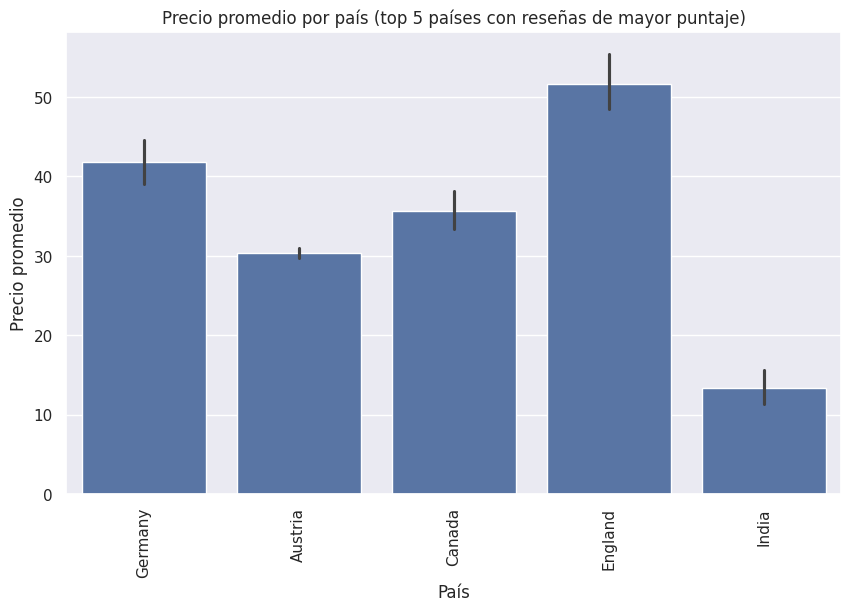

Streaming output truncated to the last 5000 lines.
El valor en la fila 125379 es: 50.0
El valor en la fila 125380 es: 14.0
El valor en la fila 125381 es: 19.0
El valor en la fila 125382 es: 42.0
El valor en la fila 125383 es: 13.0
El valor en la fila 125384 es: 19.0
El valor en la fila 125385 es: 20.0
El valor en la fila 125386 es: 23.0
El valor en la fila 125387 es: 20.0
El valor en la fila 125388 es: 36.0
El valor en la fila 125389 es: 25.0
El valor en la fila 125390 es: 30.0
El valor en la fila 125391 es: 23.0
El valor en la fila 125392 es: 23.0
El valor en la fila 125393 es: 60.0
antes de asignar: nan
despues de asignar: 25.0
El valor en la fila 125395 es: 70.0
El valor en la fila 125396 es: 16.0
El valor en la fila 125397 es: 15.0
El valor en la fila 125398 es: 30.0
El valor en la fila 125399 es: 48.0
antes de asignar: nan
despues de asignar: 25.0
El valor en la fila 125401 es: 33.0
El valor en la fila 125402 es: 15.0
El valor en la fila 125403 es: 14.0
El valor en la fila 125404 

In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DE ARCHIVO
# Cargar el archivo de datos
datos = pd.read_csv('/home/winemag-data-130k-v2.csv', delimiter='\t')

# Revisar el formato del archivo y verificar información de los datos
print("Cantidad de filas y columnas:", datos.shape)
print("Nombre de columnas:", datos.columns)
print("Tipos de datos:", datos.dtypes)

# ANÁLISIS EXPLORATORIO DE DATOS
# Explorar la estructura general de los datos
print("Estructura general de los datos:")
print(datos.head())

# Realizar un resumen estadístico inicial de las variables numéricas y categóricas importantes
print("Resumen estadístico de variables numéricas:")
print(datos.describe())
print(datos['country'].value_counts())  # Variable categórica
print("Total reg:", sum(datos['country'].value_counts()))

# Gráficos para distribución de variables
# Distribución de precios
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(datos['price'], kde=True)
plt.title('Distribución de precios')
plt.show()

# Relación entre países y precio considerando los 5 países con reseñas de mayor puntaje.
# Selecciona los 5 países con reseñas de mayor puntaje
top_5_paises = datos.groupby('country')['points'].mean().sort_values(ascending=False).head(5).index

# Filtra los datos para solo incluir los 5 países seleccionados
df_filtrado = datos[datos['country'].isin(top_5_paises)]
# Crea un gráfico de barras que muestra el precio promedio por país
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='price', data=df_filtrado)
plt.xlabel('País')
plt.ylabel('Precio promedio')
plt.title('Precio promedio por país (top 5 países con reseñas de mayor puntaje)')
plt.xticks(rotation=90)
plt.show()

# DATOS FALTANTES
# Identificar y manejar los datos faltantes en el conjunto de datos
print("Cantidad de datos faltantes por columna:")
print(datos.isnull().sum())

# Imputar los valores faltantes para el precio usando la mediana
# Crear un nuevo dataframe
df = pd.DataFrame(datos)
# Calcular la mediana de la columna 'price'
mediana_price = df['price'].median()

# Recorremos el nuevo dataframe consultando si el valor es nulo
for row_index, row in df.iterrows():
    if pd.isnull(row['price']):
        #la siguiente linea (comentada) es a modo de ejemplo para capturar que efectivamente tenía valor null
        #print(f'antes de asignar: {df.at[row_index, "price"]}')
        # Asignamos la mediana al valor null
        df.at[row_index, 'price'] = mediana_price
        #la siguiente linea (comentada) es a modo de ejemplo para capturar que luego ya tiene el valor (mediana)
        #print(f'despues de asignar: {df.at[row_index, "price"]}')
    else:
        print(f'El valor en la fila {row_index} es: {row["price"]}')

# Mostrar campo ID y price para verificar
print(datos[['ID', 'price']].head())

# ANÁLISIS DE DATOS ATÍPICOS
# Detectar posibles valores atípicos en las variables numéricas relevantes
print("Valores atípicos en la variable 'price':")
print(datos['price'].describe())





